In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Analysis

In [1]:
# reading dataset
data = pd.read_csv('./Dataset/train.csv')
data.shape


KeyboardInterrupt



In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
# check for missing values
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.Churn.value_counts()
#imbalanced class distribution in churn

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
columns = data.columns
binary_cols = []
for col in columns:
    if data[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

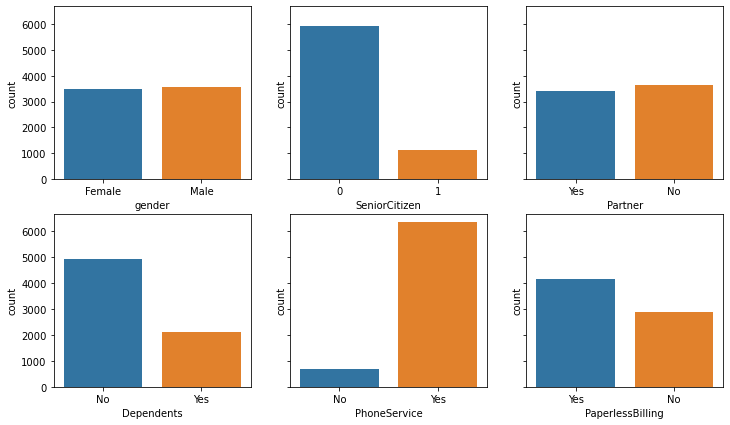

In [12]:
fig, axes = plt.subplots(2,3,figsize=(12,7),sharey=True)
sns.countplot("gender", data=data, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=data, ax=axes[0,1])
sns.countplot("Partner", data=data, ax=axes[0,2])
sns.countplot("Dependents", data=data, ax=axes[1,0])
sns.countplot("PhoneService", data=data, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=data, ax=axes[1,2])

In [14]:
churn_numeric = {'Yes':1, 'No':0}
data.Churn.replace(churn_numeric, inplace=True)

In [26]:
data[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


In [21]:
data[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [22]:
data[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [23]:
data[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [24]:
data[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [25]:
data[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


gender dont have much effect so we remove it

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InternetService', ylabel='count'>

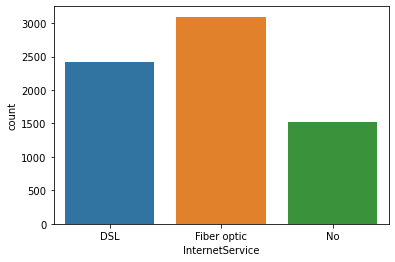

In [28]:
sns.countplot("InternetService", data=data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Contract', ylabel='count'>

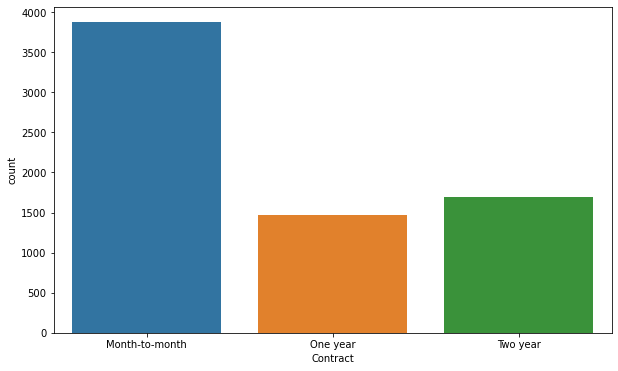

In [30]:
plt.figure(figsize=(10,6))
sns.countplot("Contract", data=data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

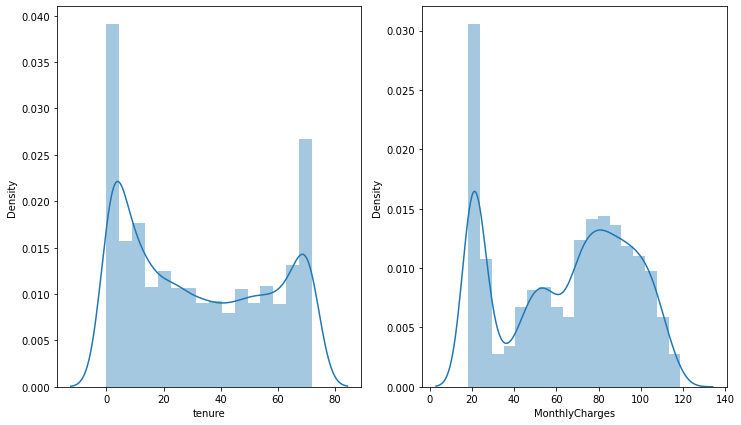

In [32]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(data["tenure"], ax=axes[0])
sns.distplot(data["MonthlyCharges"], ax=axes[1])

In [35]:
# Dropping these as they dont have much significance over churn
data.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

In [36]:
#data after preprocessing
data

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,Mailed check,84.80,0
7039,0,Yes,Yes,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,Credit card (automatic),103.20,0
7040,0,Yes,Yes,11,No phone service,DSL,Yes,No,No,No,No,No,Yes,Electronic check,29.60,0
7041,1,Yes,No,4,Yes,Fiber optic,No,No,No,No,No,No,Yes,Mailed check,74.40,1


# Data Preprocessing

In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [40]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

X = pd.get_dummies(data, columns=cat_features, drop_first=True)

In [41]:
X

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,53.85,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2,70.70,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,0,0,1,1,0,1,0,0,...,0,1,0,1,0,1,1,0,0,1
7039,72,103.20,0,0,1,1,0,1,1,0,...,0,0,0,1,0,1,1,1,0,0
7040,11,29.60,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7041,4,74.40,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1


In [43]:
sc = MinMaxScaler()
a = sc.fit_transform(data[['tenure']])
b = sc.fit_transform(data[['MonthlyCharges']])
X['tenure'] = a
X['MonthlyCharges'] = b
X

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.472222,0.385075,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.027778,0.354229,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.625000,0.239303,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.027778,0.521891,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.333333,0.662189,0,0,1,1,0,1,0,0,...,0,1,0,1,0,1,1,0,0,1
7039,1.000000,0.845274,0,0,1,1,0,1,1,0,...,0,0,0,1,0,1,1,1,0,0
7040,0.152778,0.112935,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7041,0.055556,0.558706,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Before Resampling')

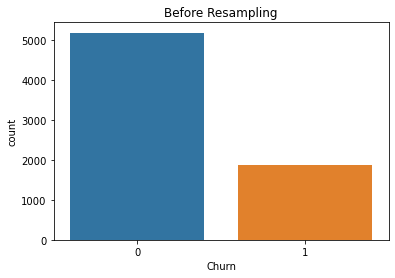

In [44]:
sns.countplot('Churn', data=data).set_title('Before Resampling')

In [47]:
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes),len(X_yes_upsampled))

1869 5174


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'After Resampling')

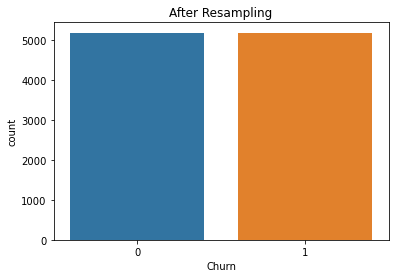

In [49]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('Churn', data=X_upsampled).set_title('After Resampling')

In [51]:
X_upsampled.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
X = X_upsampled.drop(['Churn'], axis=1)
y = X_upsampled['Churn']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [57]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

In [58]:
clf_ridge = RidgeClassifier()
clf_ridge.fit(X_train, y_train)

RidgeClassifier()

In [59]:
pred = clf_ridge.predict(X_train)
accuracy_score(y_train, pred)

0.7574293307562213

In [60]:
pred_test = clf_ridge.predict(X_test)
accuracy_score(y_test, pred_test)

0.7608695652173914

75% accuracy on training set and 76% accuracy on test set

In [61]:
# Trying different model
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [62]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.885721188692921

In [63]:
pred_test = clf_forest.predict(X_test)
accuracy_score(y_test, pred_test)

0.8410628019323672

In [65]:
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X, y)

SVC()

In [66]:
pred = clf_svm.predict(X_train)
accuracy_score(y_train, pred)

0.7936699685914472

In [67]:
pred_test = clf_svm.predict(X_test)
accuracy_score(y_test, pred_test)

0.7903381642512077

In [69]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X, y)

DecisionTreeClassifier()

In [70]:
pred = clf_tree.predict(X_train)
accuracy_score(y_train, pred)

0.9967383425948296

In [71]:
pred_test = clf_tree.predict(X_test)
accuracy_score(y_test, pred_test)

0.9975845410628019

In [72]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

In [73]:
clf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

In [74]:
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 25, 'n_estimators': 200}
0.899787850556758


We used various models and got best accuracy in Decision Tree Classifier
We used grid seach cv to increase accuracy of RandomForest and it increased to a 90%

# Models Used:
1.Ridge Classifier
2.Random Forest
3.SVM 
4.Decision Tree
5.Improved Random Forest using gridsearchcv